In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [442]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape)
train.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [443]:
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [444]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [445]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [446]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:>

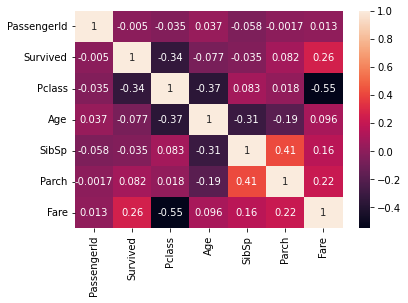

In [447]:
sns.heatmap(train.corr(),annot=True)

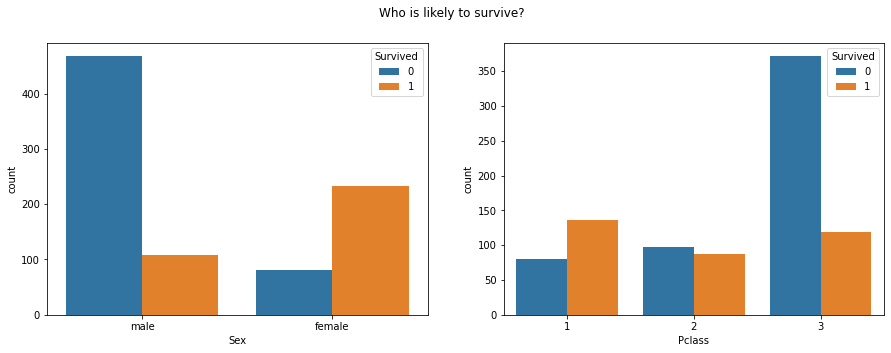

In [448]:
f,ax = plt.subplots(1,2,figsize=(15,5))
f.suptitle('Who is likely to survive?')
sns.countplot(x='Sex',hue='Survived',data=train,ax=ax[0])
sns.countplot(x='Pclass',hue='Survived',data=train,ax=ax[1])
plt.show()

- The first plot shows that the female is more likely to survive than male.
- The second plot shows that individuals in the first class are more likely to survive than other classes.

## Filling in missing values

### Cabin

The deck was determined by the letter in the cabin. We will group the cabins based on the deck they are on. For all the missing values, we will fill in U for unknown.

In [449]:
print('number of unique cabins: '+str(train['Cabin'].nunique())+ ' and number of missing cabins: '+ str(train['Cabin'].isnull().sum()))

number of unique cabins: 147 and number of missing cabins: 687


In [450]:
train['deck'] = train['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')
# we want to get this for the test set for later too
test['deck'] = test['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')


Text(0.5, 1.0, 'Survival rates by deck')

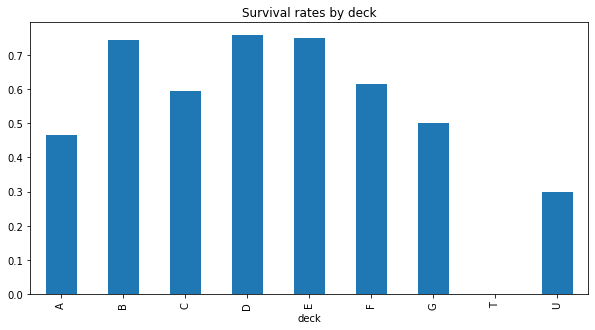

In [451]:
# then let's check our assumptions about the survival by deck
train[['deck', 'Survived']].groupby('deck')['Survived'].mean().plot(kind='bar',figsize=(10,5))
plt.title('Survival rates by deck')

### Age

- We are to check how age affects the survival rate.
- Based on the heatmap, there is a correlation between age and Pclass.
- We can also check if age makes a difference based on gender. 


<AxesSubplot:xlabel='Age', ylabel='Density'>

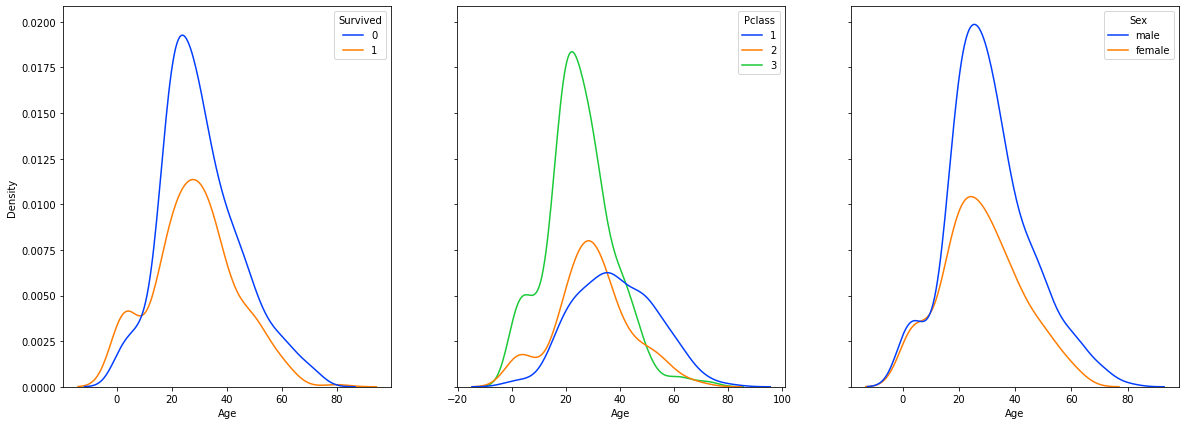

In [452]:
f,ax= plt.subplots(1,3,figsize=(20,7),sharey=True)
sns.kdeplot(x='Age',data=train,hue='Survived',palette='bright',ax=ax[0])
sns.kdeplot(x='Age',data=train,hue='Pclass',palette='bright',ax=ax[1])
sns.kdeplot(x='Age',data=train,hue='Sex',palette='bright' ,ax=ax[2])



- The first plot shows that people between the ages 20 and 40 survived more than the rest.
- The second plot shows that people in the first class are slightly older than the other classes.
- The third plot shows that there are differences in age based on sex. We can say age is correlated to sex.

With this said, we cannot use the overall mean/median to fill in all the missing values. We will take into account the sex and class of each individual, so using the mean/median per category might be better approach.

In [453]:
print('number of missing ages: '+str(train['Age'].isnull().sum()))

number of missing ages: 177


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

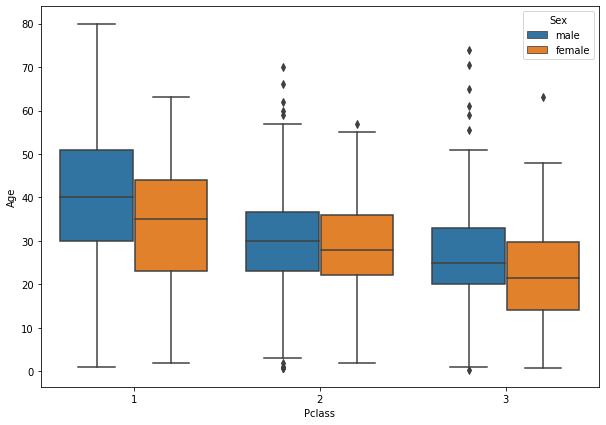

In [454]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=train)

In [455]:
#There is an age difference between the ages of difreent classes and sex within the dataset
train['Age'] = train.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

#get this for the test data too
test['Age'] = test.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

### Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

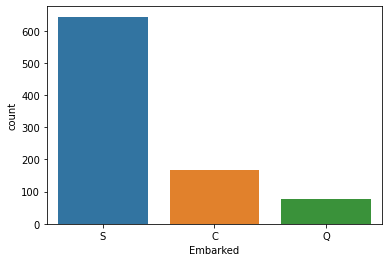

In [456]:
sns.countplot(x='Embarked',data=train)

In [457]:
print('The number of missing values for Embarked port: '+str(train['Embarked'].isnull().sum()))
train[train['Embarked'].isnull()]

The number of missing values for Embarked port: 2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


The most common port is S (SouthHamptons). So we will use this port to fill in the missing ports.

In [458]:
train['Embarked']=train['Embarked'].fillna(value='S')

### Fare

We will fill in the missing fare value based on the class and port embarked.

In [459]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,U


In [460]:
x = test[(test['Pclass']=='3')& (test['Embarked']=='S')]['Fare'].median()
test['Fare']= test['Fare'].fillna(x)

## Feature Engineering

### Name

We can extract the title from the name feature and form categories based on the titles.

In [461]:
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# do the same for test
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

<AxesSubplot:xlabel='Title', ylabel='count'>

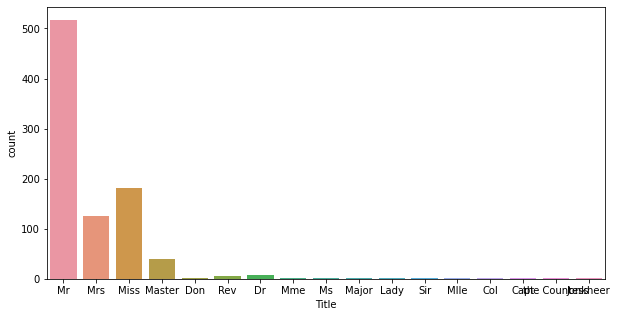

In [462]:
plt.figure(figsize=(10,5))
sns.countplot(x='Title',data=train)

Some titles have few values, so we have grouped them as Other.

In [463]:
train['Title'] = np.where(train['Title'].isin(['Mr', 'Mrs', 'Master', 'Miss']), train['Title'], 'Other')

#do the same for test
test['Title'] = np.where(test['Title'].isin(['Mr', 'Mrs', 'Master', 'Miss']), test['Title'], 'Other')

<AxesSubplot:xlabel='Title', ylabel='count'>

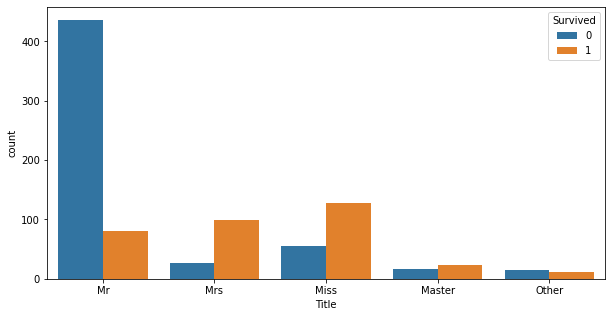

In [464]:
plt.figure(figsize=(10,5))
sns.countplot(x='Title',data=train,hue='Survived')

### Tickect

Some tickects contain letters and numerical values.The plan is to remove all the letters form the string, then group the tickets based on the first leading digit.


In [465]:
#check if there a letters or not
def prefix(ticket):
    
    check = ticket.split(' ')[0][0]
    if check.isalpha():
        return ticket.split(' ')[0]
    else:
        return 'No prefix'

def ticket_features(df):
    
    df['Ticket'] = df['Ticket'].replace('LINE','LINE 0')
    df['Ticket'] = df['Ticket'].apply(lambda x: x.replace('.','').replace('/','').lower())
    df['Prefix'] = df['Ticket'].apply(lambda x: prefix(x))
    df['TNumeric'] = df['Ticket'].apply(lambda x: int(x.split(' ')[-1]))
    df['TNlen'] = df['TNumeric'].apply(lambda x : len(str(x)))
    df['Ticket_LeadingDigit'] = df['TNumeric'].apply(lambda x : int(str(x)[0]))
    df['TGroup'] = df['TNumeric'].apply(lambda x: str(x//10))

    df = df.drop(columns=['Ticket','TNumeric','Prefix','TNlen','TGroup'])

    return df

train = ticket_features(train)
test = ticket_features(test)
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,deck,Title,Ticket_LeadingDigit
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,NaN,S,U,Mr,2


### Ecoding Categorical features

In [466]:
sex = pd.get_dummies(train['Sex'])
embarked = pd.get_dummies(train['Embarked'])
deck = pd.get_dummies(train['deck'],prefix='Cabin')
title=pd.get_dummies(train['Title'])
train= pd.concat([train,sex,title,deck,embarked],axis=1)

#do for test
sex1 = pd.get_dummies(test['Sex'])
embarked1 = pd.get_dummies(test['Embarked'])
deck1 = pd.get_dummies(test['deck'],prefix='Cabin')
title1 = pd.get_dummies(test['Title'])
test= pd.concat([test,sex1,title1,deck1,embarked1],axis=1)
pd.set_option('display.max_columns',None)
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,deck,Title,Ticket_LeadingDigit,female,male,Master,Miss,Mr,Mrs,Other,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,U,Mr,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [467]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,deck,Title,Ticket_LeadingDigit,female,male,Master,Miss,Mr,Mrs,Other,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,NaN,S,U,Mr,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [469]:
train.drop(['C', 'Other', 'Cabin_T','female'], axis = 1,inplace=True)
train.drop(['Sex'], axis = 1,inplace=True)
train.drop(['deck'],axis=1,inplace=True)
train.drop(['Name'], axis =1,inplace=True)
train.drop(['PassengerId'], axis =1,inplace=True)
train.drop(['Embarked'], axis =1,inplace=True)
train.drop(['Title'], axis =1,inplace=True)
train.drop(['Cabin'], axis=1,inplace=True)
#do for test 
test.drop(['C', 'Other','female'], axis = 1,inplace=True)
test.drop(['Sex'], axis = 1,inplace=True)
test.drop(['deck'],axis=1,inplace=True)
test.drop(['Name'], axis =1,inplace=True)
test.drop(['PassengerId'], axis =1,inplace=True)
test.drop(['Embarked'], axis =1,inplace=True)
test.drop(['Title'], axis =1,inplace=True)
test.drop(['Cabin'], axis=1,inplace=True)
train.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_LeadingDigit,male,Master,Miss,Mr,Mrs,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Q,S
0,0,3,22.0,1,0,7.25,2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [470]:
train.dtypes

Survived                 int64
Pclass                   int64
Age                    float64
SibSp                    int64
Parch                    int64
Fare                   float64
Ticket_LeadingDigit      int64
male                     uint8
Master                   uint8
Miss                     uint8
Mr                       uint8
Mrs                      uint8
Cabin_A                  uint8
Cabin_B                  uint8
Cabin_C                  uint8
Cabin_D                  uint8
Cabin_E                  uint8
Cabin_F                  uint8
Cabin_G                  uint8
Cabin_U                  uint8
Q                        uint8
S                        uint8
dtype: object